In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import stackview
from read_roi import read_roi_zip

In [70]:
FOLDER=Path("C:/Users/jmc010/Data/fostrap/FT112")
FOLDER=Path("/data/FTIG/FT162/")

In [71]:
# steps
# 1. read in section names, channels, ROIs
# 2. user inputs each of these - initially via typing but then try to populate dropdowns
# 3. read in low-res section + ROI and make image (start with only first ROI found but then move on to choice of ROI)
# 4. calculate ROI boundaries (min and max in each direction)
# 5. get images from each channel - original and mask, reduce size, squeeze into 8 bit, and plot with curtain.
# 6. maybe add bit with both channels if seems useful

# extra
# need to make function to simplify ROI zip file by removing identical ROIs

In [72]:
def get_sections(folder):
    
    contents = os.listdir(folder / "hires" / "chan1")
    
    sections = [f.split("_")[2] for f in contents if f.endswith("masks.png")]
    return sections

def parse_roi_name(roiname):
    
    section = roiname.split("_")[0]
    region = "".join(roiname.split("_")[1:]).split("-")[0]
    
    return section, region

def get_rois(roidata):
    
    regions = []
    for roi in roidata:
        _, region = parse_roi_name(roi)
        regions.append(region)
        
    return list(set(regions))

sections = get_sections(FOLDER)

roipath = FOLDER / "lowres" / "{}_userdefined_ROIs_cleaned.zip".format(FOLDER.name)
roidata = read_roi_zip(roipath)
rois = get_rois(roidata)

In [73]:
print(sections)
print(rois)
SECTION = 's014'
ROI = 'arcuate'

"{}_{}".format(SECTION, ROI) in roidata.keys()

['s000', 's001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009', 's010', 's011', 's012', 's013', 's014', 's015', 's016', 's017', 's018', 's019', 's020', 's021', 's022', 's023', 's024', 's025', 's026', 's027']
['naccore37', 'caudateput2', 'piriform56', 'pvthal107', 'arcuate111', 'nacshell40', 'sensoryctx110', 'piriform32', 'piriform31', 'pvthal87', 'lathypo95', 'sensoryctx109', 'pvhypo86', 'piriform42', 'caudateput38', 'insula48', 'lathypo105', 'arcuate120', 'pvthal79', 'lathypo106', 'caudateput43', 'caudateput66', 'lathypo116', 'caudateput26', 'nacshell39', 'naccore52', 'insula47', 'pvhypo97', 'caudateput46', 'caudateput33', 'pvthal108', 'caudateput65', 'pvthal102', 'naccore36', 'naccore27', 'nacshell54', 'pvhypo85', 'caudateput1', 'nacshell29', 'nacshell53', 'naccore51', 'pvthal90', 'caudateput57', 'nacshell30', 'lathypo96', 'naccore28', 'piriform55', 'piriform41', 'motorctx50', 'pvhypo98', 'lathypo115', 'caudateput23', 'motorctx49', 'pvthal99', 'arcuate114', 'caudatep

False

In [74]:
print(roidata.keys())


odict_keys(['s003_caudate_put_23', 's003_caudate_put_26', 's003_naccore_27', 's003_naccore_28', 's003_nacshell_29', 's003_nacshell_30', 's003_piriform_31', 's003_piriform_32', 's004_caudate_put_33', 's004_naccore_36', 's004_naccore_37', 's004_caudate_put_38', 's004_nacshell_39', 's004_nacshell_40', 's004_piriform_41', 's004_piriform_42', 's005_caudate_put_43', 's005_caudate_put_46', 's005_insula_47', 's005_insula_48', 's005_motorctx_49', 's005_motorctx_50', 's005_naccore_51', 's005_naccore_52', 's005_nacshell_53', 's005_nacshell_54', 's005_piriform_55', 's005_piriform_56', 's006_caudate_put_57', 's006_caudate_put_58', 's008_caudate_put_65', 's008_caudate_put_66', 's010_pv_thal_79', 's010_pv_thal_82', 's011_pv_hypo_85', 's011_pv_hypo_86', 's011_pv_thal_87', 's011_pv_thal_90', 's012_lat_hypo_95', 's012_lat_hypo_96', 's012_pv_hypo_97', 's012_pv_hypo_98', 's012_pv_thal_102', 's012_pv_thal_99', 's013_lat_hypo_105', 's013_lat_hypo_106', 's013_pv_thal_107', 's013_pv_thal_108', 's013_sensoryct

In [107]:
roi_to_examine = 's014_lat_hypo_115'
roi = roidata[roi_to_examine]
section = roi_to_examine.split("_")[0]

In [108]:
lowresimages = [f for f in os.listdir(FOLDER / "lowres") if f.endswith("{}.jpg".format(section))]
if len(lowresimages) != 1:
    print("Problem finding correct lowres image")
else:
    im = imread(FOLDER / "lowres" / lowresimages[0])

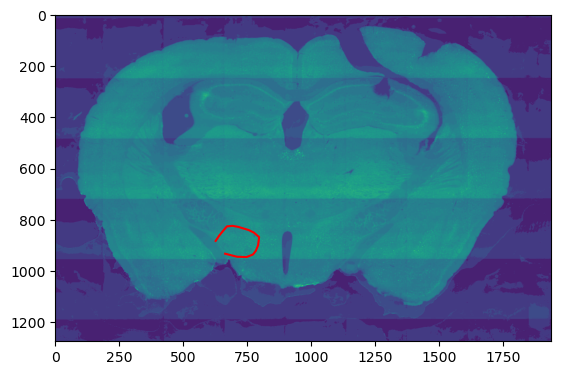

In [109]:
f, ax = plt.subplots()
ax.imshow(im)
ax.plot(roi["x"], roi["y"], color="red")

In [110]:
scale_factor = 4
roi_min_x, roi_max_x = np.min(roi["x"])*scale_factor, np.max(roi["x"])*scale_factor
roi_min_y, roi_max_y = np.min(roi["y"])*scale_factor, np.max(roi["y"])*scale_factor

In [111]:
image1_c1 = imread(FOLDER / "hires" / "chan1" / "FT162_1A_{}.png".format(section))
image2_c1 = imread(FOLDER / "hires" / "chan1" / "FT162_1A_{}_cp_masks.png".format(section))

image1_c2 = imread(FOLDER / "hires" / "chan2" / "FT162_1A_{}.png".format(section))
image2_c2 = imread(FOLDER / "hires" / "chan2" / "FT162_1A_{}_cp_masks.png".format(section))

In [112]:
def normalize_image(image):
    
    normed_im = image/np.max(image) * 255
    
    return np.clip(normed_im, 0, 255)

im1_c1_small = image1_c1[roi_min_y:roi_max_y, roi_min_x:roi_max_x]
im2_c1_small = image2_c1[roi_min_y:roi_max_y, roi_min_x:roi_max_x]

im1_c2_small = image1_c2[roi_min_y:roi_max_y, roi_min_x:roi_max_x]
im2_c2_small = image2_c2[roi_min_y:roi_max_y, roi_min_x:roi_max_x]

In [113]:
stackview.curtain(normalize_image(im1_c1_small), im2_c1_small, continuous_update=True, zoom_factor=2, alpha=0.9)

In [30]:
stackview.curtain??

In [36]:
stackview.curtain(normalize_image(im1_c2_small), im2_c2_small, continuous_update=True, zoom_factor=2, alpha=0.9)

In [105]:
# need to add this code to ROI counting script to avoid duplicates
# ideally find a way to "fix" ROI zip file to remove duplicates

import pandas as pd
df = pd.DataFrame.from_dict(roidata, orient="index")
len(df.drop_duplicates(subset="x"))

In [17]:

image1 = imread(FOLDER / "hires" / "chan2" / "FT112_1A_s000.png")
image2 = imread(FOLDER / "hires" / "chan2" / "FT112_1A_s000_cp_masks.png")

C:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\imageio\plugins\pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


In [31]:
np.max(image1)

26359

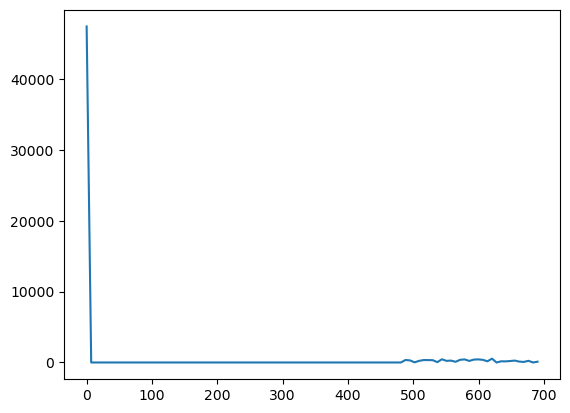

In [163]:
import matplotlib.pyplot as plt
x, y = np.histogram(im2_small, bins=100)

f, ax =plt.subplots()

ax.plot(y[:-1], x)
# ax.set_xlim((0,1000))

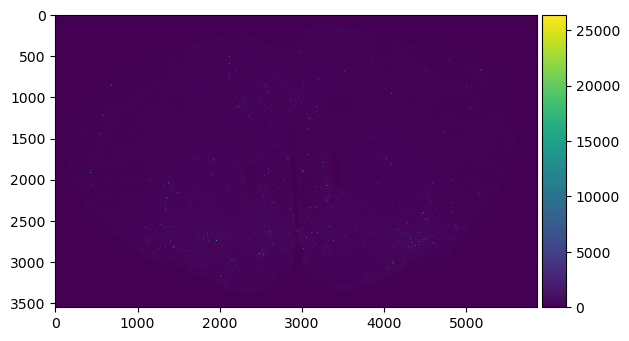

In [32]:
imshow(image1)

In [23]:
im1_small = image1[2000:2250, 2000:2250]
im2_small = image2[2000:2250, 2000:2250]

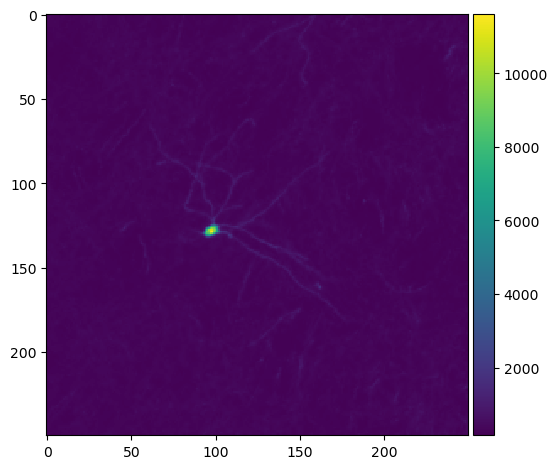

In [28]:
imshow(im1_small)

In [25]:
imagestack = np.concatenate([im1_small, im2_small])

In [26]:
stackview.curtain(im1_small, im2_small, continuous_update=True)

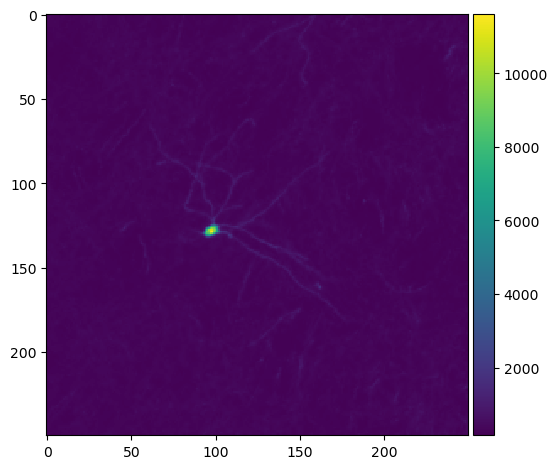

In [27]:
imshow(im1_small)